# Movie Budget / Profit and Return Ratio Scrapping and Plotting.

1. Movie Budget CSV Scrap

In [140]:
import requests
from bs4 import BeautifulSoup

html = requests.get('https://www.the-numbers.com/movie/budgets/all')

In [141]:
bs = BeautifulSoup(html.content,'html.parser')
#bs

In [142]:
#for link in bs.find_all('a'):
#    print(link.attrs)

In [143]:
bs.find_all('a')[2].attrs

{'href': 'https://www.twitter.com/MovieNumbers',
 'target': '_blank',
 'title': 'Follow The Numbers on Twitter'}

In [144]:
# for link in bs.find_all('a'):
#     if 'href' in link.attrs:
#         print(link.attrs['href'])

In [145]:
# Get all hyperlinks
import requests
from bs4 import BeautifulSoup

html = requests.get('https://www.the-numbers.com/movie/budgets/all')

import re
soup_list = bs.findAll("tr")
soup_list.pop(0)
len(soup_list)


100

In [147]:
# Extract the Table. 
import pandas as pd

index_name = []
release_date = []
movie_name = []
prod_budget = []
domestic_gross = []
worldwide_gross = []
total_gross = []
profit = []
return_ratio = []

for tr in soup_list:
    td = tr.find_all('td')
 
    index_name_ =  td[0].text.strip()
    release_date_ = td[1].text.strip()
    movie_name_ = td[2].text.strip()
    prod_budget_ = int(td[3].text.strip().replace("$","").replace(",",""))
    domestic_gross_ = int(td[4].text.strip().replace("$","").replace(",",""))
    worldwide_gross_ = int(td[5].text.strip().replace("$","").replace(",",""))
    total_gross_ = domestic_gross_ + worldwide_gross_
    profit_ = total_gross_ - prod_budget_
    return_ratio_ = profit_/prod_budget_
    
    index_name.append(index_name_) 
    release_date.append(release_date_)
    movie_name.append(movie_name_)
    prod_budget.append(prod_budget_)
    domestic_gross.append(domestic_gross_)
    worldwide_gross.append(worldwide_gross_)
    total_gross.append(total_gross_)
    profit.append(profit_)
    return_ratio.append(return_ratio_)
    
#print(index_name)

df = pd.DataFrame(list(zip(index_name, release_date, movie_name, prod_budget, domestic_gross, worldwide_gross, total_gross, profit, return_ratio)),
               columns =['Index', 'Release Date', 'Movie', 'Production Budget', 'Domestic Gross', 'WorldWide Gross', 'Total Gross', 'Profit', 'Return Ratio'])
df

,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross,Profit,Return Ratio
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584
...,...,...,...,...,...,...,...,...,...
95,96,"Oct 25, 2019",Terminator: Dark Fate,185000000,62253077,250372367,312625444,127625444,0.689867
96,97,"Jul 28, 2021",The Suicide Squad,185000000,55817425,167120232,222937657,37937657,0.205068
97,98,"May 22, 2019",Aladdin,182000000,355559216,1046649706,1402208922,1220208922,6.704445
98,99,"Oct 25, 2017",Thor: Ragnarok,180000000,315058289,850482778,1165541067,985541067,5.475228


### Saving the results to a CSV file

In [148]:

display(df.dtypes)


Index                 object
Release Date          object
Movie                 object
Production Budget      int64
Domestic Gross         int64
WorldWide Gross        int64
Total Gross            int64
Profit                 int64
Return Ratio         float64
dtype: object

In [150]:
#Export to CSV. 

df.to_csv('Movie_Budget.csv', index=False)    

df

,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross,Profit,Return Ratio
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584
...,...,...,...,...,...,...,...,...,...
95,96,"Oct 25, 2019",Terminator: Dark Fate,185000000,62253077,250372367,312625444,127625444,0.689867
96,97,"Jul 28, 2021",The Suicide Squad,185000000,55817425,167120232,222937657,37937657,0.205068
97,98,"May 22, 2019",Aladdin,182000000,355559216,1046649706,1402208922,1220208922,6.704445
98,99,"Oct 25, 2017",Thor: Ragnarok,180000000,315058289,850482778,1165541067,985541067,5.475228


In [151]:
# Create Total Gross Column
# Create Profit Column.
# Create ROI % Profit  / Budget Ratio Chart. 

df



,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross,Profit,Return Ratio
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584
...,...,...,...,...,...,...,...,...,...
95,96,"Oct 25, 2019",Terminator: Dark Fate,185000000,62253077,250372367,312625444,127625444,0.689867
96,97,"Jul 28, 2021",The Suicide Squad,185000000,55817425,167120232,222937657,37937657,0.205068
97,98,"May 22, 2019",Aladdin,182000000,355559216,1046649706,1402208922,1220208922,6.704445
98,99,"Oct 25, 2017",Thor: Ragnarok,180000000,315058289,850482778,1165541067,985541067,5.475228


In [152]:
import csv

def load_csv(filename, delim=','):
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter=delim)
        for row in reader:
            data.append(row)
    return data


In [153]:
data = load_csv('Movie_Budget.csv')
#print(data)

C:\Users\llow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\llow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\llow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\llow\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


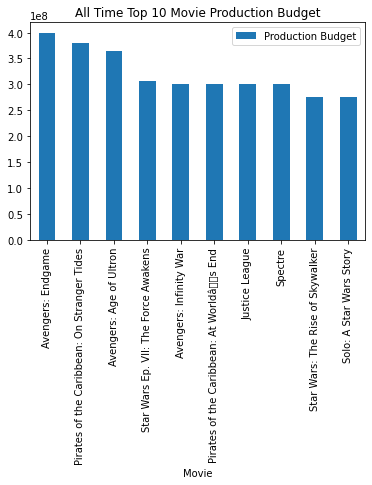

In [154]:
# Plot Graph
import pandas as pd
import matplotlib.pyplot as plt

# Simple Plot shows top 10 highest Production Budget Movie.
df.iloc[0:10].plot(kind='bar',x='Movie',y='Production Budget').set_title("All Time Top 10 Movie Production Budget")
plt.savefig('ProductionBudget.png')


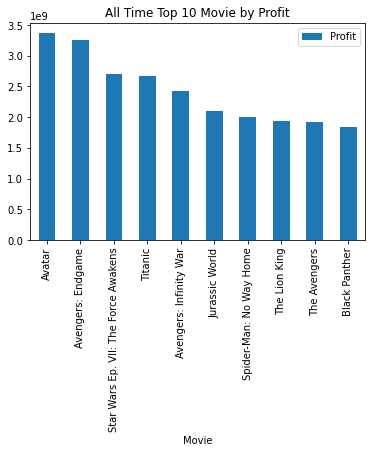

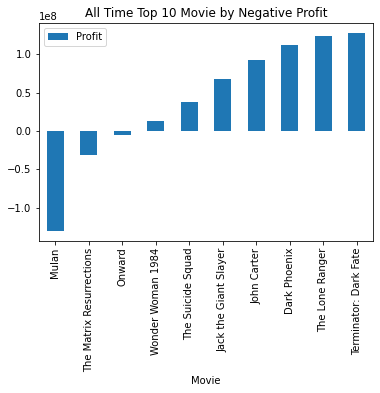

In [155]:
# Plot Graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simple Plot shows top 10 highest Profit Movie

df.sort_values(by=['Profit'],ascending=False).iloc[0:10].plot(kind='bar',x='Movie',y='Profit').set_title("All Time Top 10 Movie by Profit")
plt.savefig('ProductionProfit.png')

df.sort_values(by=['Profit'],ascending=True).iloc[0:10].plot(kind='bar',x='Movie',y='Profit').set_title("All Time Top 10 Movie by Negative Profit")
plt.savefig('ProductionNegativeProfit.png')


#'%1.1fM' % (x * 1e-6)

#####################
# df.sort_values('Profit', ascending = False, inplace= True)
# fig, ax = plt.subplots( figsize=(6,4))
# #ax.bar(range(len(X_train.columns)),clf.feature_importances_ )

# #ax.bar(range(len(df.Movie)),df.Profit )  
# #plt.xticks(range(len(df.Movie)),df.Movie,rotation=90)

# ax.bar(range(len(df.Movie)),df.Profit)
# plt.xticks(range(len(df.Movie)),df.Movie,rotation=90)
# ax.set_title("All Time Top 10 Movie by Profit")
# plt.show()

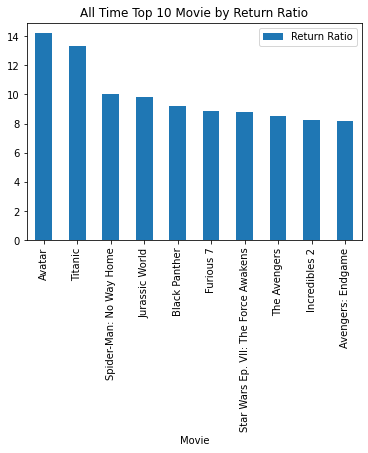

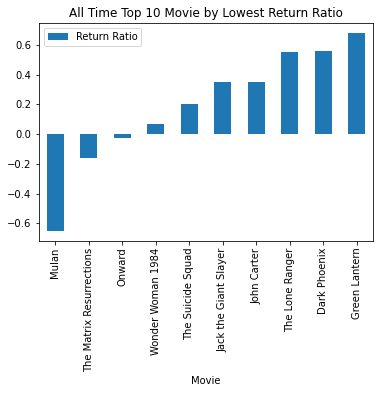

In [156]:
# Plot Graph
import pandas as pd
import matplotlib.pyplot as plt

# Simple Plot shows top 10 highest Profit Movie

df.sort_values(by=['Return Ratio'],ascending=False).iloc[0:10].plot(kind='bar',x='Movie',y='Return Ratio').set_title("All Time Top 10 Movie by Return Ratio")
plt.savefig('HighestReturnRatio.png')

df.sort_values(by=['Return Ratio'],ascending=True).iloc[0:10].plot(kind='bar',x='Movie',y='Return Ratio').set_title("All Time Top 10 Movie by Lowest Return Ratio")
plt.savefig('LowestReturnRatio.png')
